In [1]:
import numpy as np
import os 
from PIL import Image
import matplotlib.pyplot as plt
from utils import load_image, show

In [ ]:
from upsample import learnable_upsample, upsample
from downsample.interpolation import (
    bicubic_interpolation_downsample
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.02893485..1.0082523].


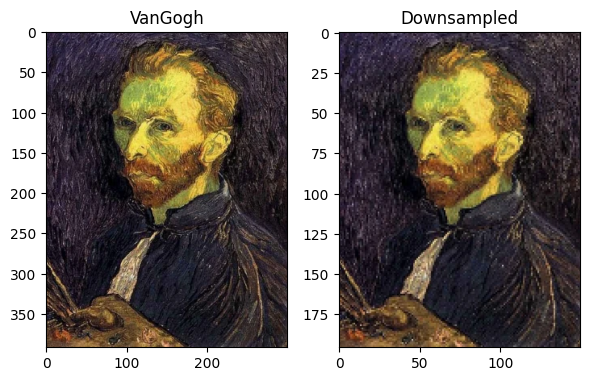

In [ ]:
scale_factor = 2
img_path = "./asserts/VanGogh.jpg"
img = load_image(img_path)
downsampled_img = bicubic_interpolation_downsample(img, 2)
show([img, downsampled_img], ["VanGogh", "Downsampled"])

In [ ]:
rule_based_names = ['neighbor', 'bilinear', 'bicubic']
rule_based_res = []
for name in rule_based_names:
    print(name)
    res = upsample(img, scale_factor, name)
    # show(res, name)
    rule_based_res.append(res)

neighbor
bilinear
bicubic


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.042710353..1.0175862].


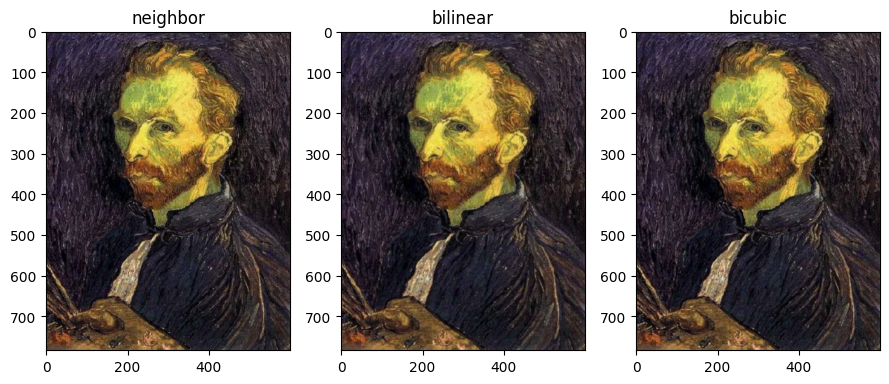

In [ ]:
show(rule_based_res, rule_based_names)

In [ ]:
# from utils import calculate_mse
# from filters.frequency_domain import apply_freq_filter
# mses = [calculate_mse(gt, i) for i in res]
# print(mses)
# # filtered_res = [apply_freq_filter(i, 'gaussian', 50) for i in res]
# filtered_img = apply_freq_filter(img, 'gaussian', 50)
# filtered_downsampled = bicubic_interpolation_downsample(filtered_img, 2)
# filtered_res = [
#     gt, 
#     nearest_neighbor_upsample(filtered_downsampled, 2),
#     bilinear_upsample(filtered_downsampled, 2)
#     ]
# filtered_mses = [calculate_mse(gt, i) for i in filtered_res]
# print(filtered_mses)

### Transposed Conv Net
接口

In [ ]:
tcn_ckpt_path = "/data/zhangxiao/ImageProcess/upsample/TCN/checkpoints/best_tcn.pth"
espcn_ckpt_path = "/data/zhangxiao/ImageProcess/upsample/ESPCN/checkpoints/x2/best.pth"
rdn_ckpt_path = "/data/zhangxiao/ImageProcess/upsample/RDN/checkpoints/x2/best.pth"
srcnn_ckpt_path = "/data/zhangxiao/ImageProcess/upsample/SRCNN/checkpoints/x2/best.pth"

In [ ]:
upsample_names = ['ESPCN', 'RDN', 'SRCNN', 'TCN']
upsample_results = []
for name in upsample_names:
    res = upsample(img, 2, us_name=name)
    upsample_results.append(res)

KeyError: 'SRCNN'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.14062607..1.134946].


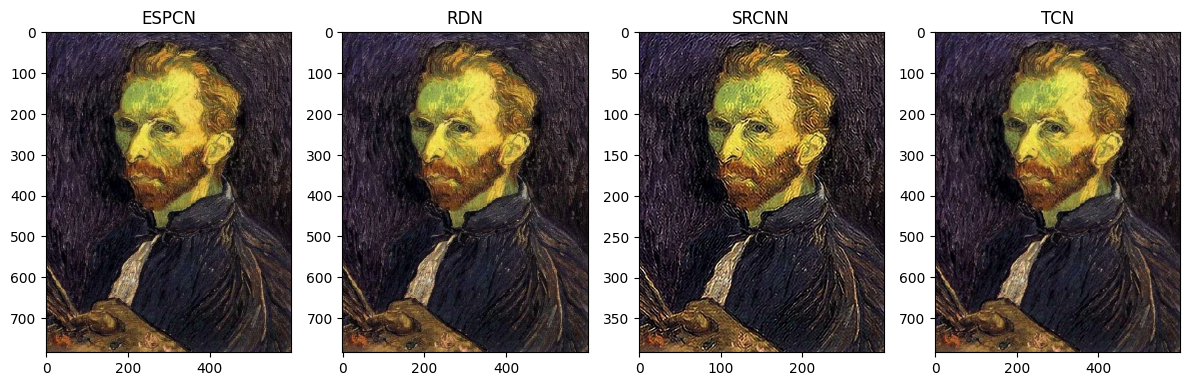

In [ ]:
show(upsample_results, upsample_names)